In [1]:
1+1

2

## Token

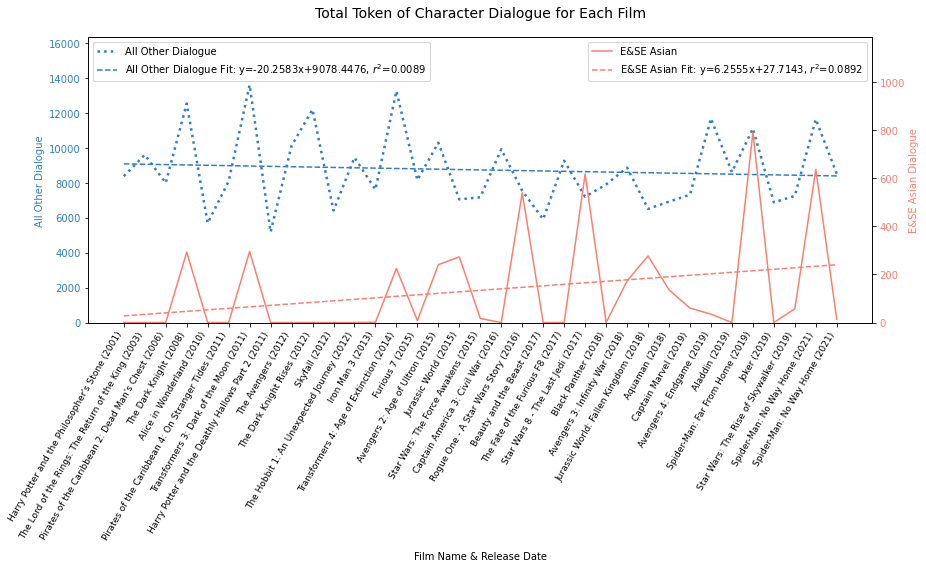

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_excel("/Users/dorothyhan/Desktop/Data Update_2026.01.13/Token/DATA_Token.xlsx")
df['Time'] = pd.to_datetime(df['Time'], format='%B %d, %Y')

# Make sure df is sorted by Time
df = df.sort_values('Time')

# x-axis values will now be an array of integers from 0 to the length of your dataframe
x_values = np.arange(len(df))

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(13,8))
plt.xticks(fontsize=9)

# left y-axis
non_asian_line, = ax1.plot(x_values, df['Non-Asian'], label='All Other Dialogue', color='#2f7fc1', linestyle=':', linewidth=2.5)
ax1.set_xlabel('Film Name & Release Date', labelpad=10)
ax1.set_ylabel('All Other Dialogue', color='#2f7fc1')
ax1.tick_params(axis='y', labelcolor='#2f7fc1')

# right y-axis
ax2 = ax1.twinx()
asian_line, = ax2.plot(x_values, df['Asian'], label='E&SE Asian', color='#fa7f6f')
ax2.set_ylabel('E&SE Asian Dialogue', color='#fa7f6f')
ax2.tick_params(axis='y', labelcolor='#fa7f6f')

# Performing linear regression on the data
non_asian_slope, non_asian_intercept, non_asian_r_value, _, _ = stats.linregress(x_values, df['Non-Asian'])
asian_slope, asian_intercept, asian_r_value, _, _ = stats.linregress(x_values, df['Asian'])

# Plotting the linear regression lines on the graph
non_asian_line = ax1.plot(x_values, non_asian_slope*x_values + non_asian_intercept, label=f'All Other Dialogue Fit: y={non_asian_slope:.4f}x+{non_asian_intercept:.4f}, $r^2$={non_asian_r_value**2:.4f}', color='#2f7fc1', linestyle='--')
asian_line = ax2.plot(x_values, asian_slope*x_values + asian_intercept, label=f'E&SE Asian Fit: y={asian_slope:.4f}x+{asian_intercept:.4f}, $r^2$={asian_r_value**2:.4f}', color='#fa7f6f', linestyle='--')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Determine the range for the dialogue length
non_asian_range = (0, df['Non-Asian'].max() * 1.2)
asian_range = (0, df['Asian'].max() * 1.5)

# Set the range for the y-axis
ax1.set_ylim(non_asian_range)
ax2.set_ylim(asian_range)

# set x-ticks and x-ticklabels to be the index and date
ax1.set_xticks(x_values)
ax1.set_xticklabels(df['Name'], rotation=60, ha='right')

# Add a title
plt.title("Total Token of Character Dialogue for Each Film", pad=20, fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig("Figure 3.png",
           dpi=300,
    bbox_inches='tight')
plt.show()


# Average value

In [3]:
#Token

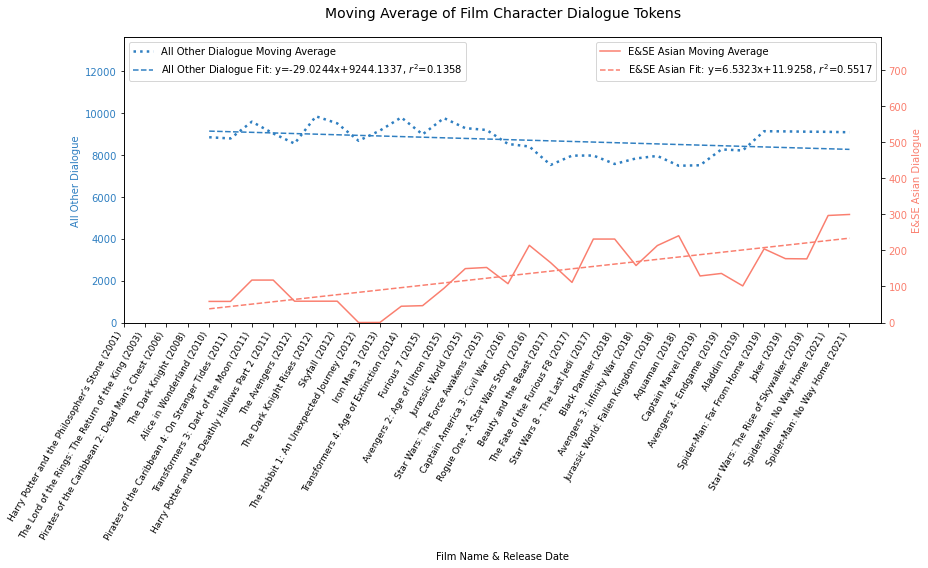

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_excel("/Users/dorothyhan/Desktop/Data Update_2026.01.13/Token/DATA_Token.xlsx")
df['Time'] = pd.to_datetime(df['Time'], format='%B %d, %Y')

# Make sure df is sorted by Time
df = df.sort_values('Time')

# 'date' column is the date data
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values('Time', inplace=True)

# x-axis values will now be an array of integers from 0 to the length of your dataframe
x_values = np.arange(len(df))

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(13,8))
plt.xticks(fontsize=9)

# left y-axis
ax1.set_xlabel('Film Name & Release Date', labelpad=10)
ax1.set_ylabel('All Other Dialogue', color='#2f7fc1')
ax1.tick_params(axis='y', labelcolor='#2f7fc1')

# right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('E&SE Asian Dialogue', color='#fa7f6f')
ax2.tick_params(axis='y', labelcolor='#fa7f6f')

# Calculate moving averages
window_size = 5  # Change this value as needed
df['Asian_MA'] = df['Asian'].rolling(window=window_size).mean()
df['Non-Asian_MA'] = df['Non-Asian'].rolling(window=window_size).mean()

# Plot moving averages
ax1.plot(x_values, df['Non-Asian_MA'], label='All Other Dialogue Moving Average', color='#2f7fc1',linestyle=':', linewidth=2.5)
ax2.plot(x_values, df['Asian_MA'], label='E&SE Asian Moving Average', color='#fa7f6f', linestyle='-')

# Perform linear regression on moving averages
non_asian_slope, non_asian_intercept, non_asian_r_value, _, _ = stats.linregress(x_values[window_size - 1:], df['Non-Asian_MA'].dropna())
asian_slope, asian_intercept, asian_r_value, _, _ = stats.linregress(x_values[window_size - 1:], df['Asian_MA'].dropna())

# Add linear regression lines of moving averages to the plot
non_asian_line = ax1.plot(x_values[window_size - 1:], non_asian_slope*x_values[window_size - 1:] + non_asian_intercept, label=f'All Other Dialogue Fit: y={non_asian_slope:.4f}x+{non_asian_intercept:.4f}, $r^2$={non_asian_r_value**2:.4f}', color='#2f7fc1', linestyle='--')
asian_line = ax2.plot(x_values[window_size - 1:], asian_slope*x_values[window_size - 1:] + asian_intercept, label=f'E&SE Asian Fit: y={asian_slope:.4f}x+{asian_intercept:.4f}, $r^2$={asian_r_value**2:.4f}', color='#fa7f6f', linestyle='--')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Determine the range for the dialogue length
non_asian_range = (0, df['Non-Asian'].max() * 1.0)
asian_range = (0, df['Asian'].max() * 1.0)

# Set the range for the y-axis
ax1.set_ylim(non_asian_range)
ax2.set_ylim(asian_range)

# set x-ticks and x-ticklabels to be the index and date
ax1.set_xticks(x_values)
ax1.set_xticklabels(df['Name'], rotation=60, ha='right')

# Add a title
plt.title('Moving Average of Film Character Dialogue Tokens', pad=20, fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig("Figure 4.png",
           dpi=300,
    bbox_inches='tight')
plt.show()